# Aufgabe 3
Gegeben sei eine zweidimensionale Gaußverteilung mit
$
\mu_x = 4, \, \mu_y = 2, \, \sigma_x = 3{,}5, \, \sigma_y = 1{,}5, \, \text{cov}(x,y) = 4{,}2\,.
$

## Teilaufgabe a)
Wie groß ist der Korrelationskoeffizient?
Der Korrelationskoeffizient ergibt sich nach der Formel aus den Folien zu
$$\begin{equation}
\rho(x,y) = \frac{\text{cov}(x,y)}{\sigma_x \cdot \sigma_y} = \frac{4{,}2}{3{,5} \cdot 1{,5}} = 0{,}8\,.
\end{equation}
$$

## Teilaufgabe b)
Zu zeigen ist, dass Kurven konstanter Wahrscheinlichkeitsdichte Ellipsen sind.
Die Wahrscheinlichkeitsdichtefunktion der bivariaten Normalverteilung ist durch
$$
f(x,y) =
      \frac{1}{2 \pi  \sigma_x \sigma_y \sqrt{1-\rho^2}}
      \exp\left(
        -\frac{1}{2(1-\rho^2)}\left[
          \frac{(x-\mu_x)^2}{\sigma_x^2} +
          \frac{(y-\mu_y)^2}{\sigma_y^2} -
          \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y}
        \right]
      \right)
$$
gegeben.
Soll nun f(x,y) konstant sein, so muss der Exponent konstant sein. Dies ergibt
$$-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y}\right] = \text{const.}\,.
$$
Das ist eine Ellipsengleichung, da stets durch die Konstante dividiert werden kann. Der Mittelpunkt dieser Ellipse ist $(\mu_x,\mu_y)^\text{T}$ und die Halbachsen in $x,y$-Richtung sind $1/(1-\rho^2 \sigma_{x,y}^2)$, falls die Konstante gleich eins gesetzt wird. Der Mischterm verdeutlicht, dass die Ellipse gegen die kartesischen Koordinatenachsen verdreht ist.

20.015129635944852
0.8


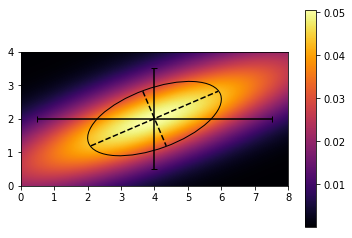

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

sigmax = 3.5
sigmay = 1.5
covariance = 4.2
rho = 0.8
cov = np.array([[12.25, 4.2], [4.2, 2.25]])
mu = np.array([4,2])
mux = 4
muy = 2
B = 1/(1-rho**2) * np.array([[sigmax**(-2), -rho/(sigmax*sigmay)], [-rho/(sigmax*sigmay), sigmay**(-2)]])
alpha = np.degrees(0.5 * np.arctan(2*rho*sigmax*sigmay/(sigmax**2-sigmay**2)))
print(alpha)
print(rho)

ells = [Ellipse(xy=(4,2), width=2*np.sqrt(sigmax**2*(1-rho**2)), height=2*np.sqrt(sigmay**2*(1-rho**2)), angle = alpha, fill=False)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)

def f(x,y):
    k = 1/(2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2))
    Vorfaktor = -1/(2*(1-rho**2))
    return k * np.exp(Vorfaktor*((x-4)**2/sigmax**2 - 2*rho*(x-4)*(y-2)/(sigmax*sigmay)+ (y-2)**2/sigmay**2))
x = np.arange(0,8.0,0.01)
y = np.arange(0.0,4.0,0.01)

X,Y = np.meshgrid(x, y)
Z =f(X,Y)
plt.pcolormesh(X,Y,Z,cmap='inferno')
plt.colorbar()

plt.errorbar(4, 2, yerr=sigmay, xerr=sigmax, ecolor='k',capsize=3)

#Neue Achsen---------------------
a = -np.tan(alpha)
b = 2-(a*4)
def f(x):
    return a*x+b

x = np.linspace(3.65,4.35)
plt.plot(x, f(x), 'k--')

x = np.linspace(2.1,5.9)
a = 1/np.tan(alpha) 
b = 2-(a*4)
plt.plot(x,f(x), 'k--')
#--------------------------------

plt.show()

alpha = np.radians(alpha)
M = [[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]]
C = [[sigmax**2, covariance], [covariance, sigmay**2]] 
MTC = np.matmul(np.transpose(M), C)
G = np.matmul(MTC, M)

sigmax1 = G[0,0]
sigmay1 = G[1,1]

